# Data Preparation and k-Nearest Neighbors (k-NN)

Data preparation and feature engineering are foundational steps in any machine learning workflow. This notebook provides a comprehensive walkthrough of essential steps in preparing data, engineering features, and applying k-Nearest Neighbors (k-NN) for both regression and classification tasks. Real-world datasets are used throughout, with practical code and visualizations.

---

## Table of Contents
1. [Loading Data into Pandas](#loading)
2. [Understanding and Examination of Data Set](#examination)
3. [Data Preprocessing](#preprocess)
3. [Target Column Outcomes](#target)
4. [Obtaining Numerical Features from Categorical Columns](#categorical)
5. [Mapping of Ordinal Features](#ordinal)
6. [Construction Features](#construction)
7. [Regression](#regression)
8. [Generalization, Overfitting, and Underfitting](#generalization)
9. [Model Complexity and Dataset Size](#complexity)
10. [k-Nearest Neighbors (Regression)](#knnreg)
11. [k-Nearest Neighbors (Classification)](#knnclass)


---

## 1.1 Loading Data into Pandas <a id="loading"></a>


Loading data is the first step in any data science or machine learning workflow. Pandas is a powerful Python library for data manipulation and analysis. It allows us to load, inspect, and preprocess data efficiently.

When loading data, it is important to:
- Check the format and delimiter of the file (e.g., CSV, TXT).
- Handle missing values and data types appropriately.
- Preview the first few rows to understand the structure.

In this example, we load the Telco Customer Churn dataset, which contains information about customers and whether they have churned (left the service).

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load the Telco Customer Churn dataset
df = pd.read_csv('New_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# Preview the data
display(df.head())
# Check for missing values
missing = df.isnull().sum()
display(missing[missing > 0])
# Drop rows with missing values
df_clean = df.dropna()
# Identify categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)
# Scale numerical features
numeric_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
# Show the processed data
display(df_encoded.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Series([], dtype: int64)

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,-0.439916,-1.277445,-1.160323,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.439916,0.066327,-0.259629,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.439916,-1.236724,-0.362660,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-0.439916,0.514251,-0.746535,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.439916,-1.236724,0.197365,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### Key Points
- Loading data is the first step in any data science workflow.
- Pandas provides powerful tools for reading, inspecting, and preprocessing data.
- Always check file format, handle missing values, and preview data structure.

### Review Questions
- What are the steps to load a CSV file using pandas?
- Why is it important to check for missing values when loading data?
- How can you preview the first few rows of a DataFrame?

## 1.2 Understanding and Examination of Data Set

Before building any models, it is crucial to understand the dataset's structure, types of features, and the presence of missing or anomalous values.

Key steps include:
- Using `.info()` to check data types, non-null counts, and memory usage.
- Using `.describe()` to get summary statistics for numerical and categorical columns.
- Identifying potential issues such as missing values, outliers, or inconsistent data.

A thorough examination helps in deciding the right preprocessing and modeling strategies.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Key Points
- Understanding the dataset structure is crucial before modeling.
- Use `.info()` and `.describe()` to explore data types, missing values, and summary statistics.
- Identifying issues early helps guide preprocessing and modeling decisions.

### Review Questions
- What does the `.info()` method show about a DataFrame?
- How can you identify missing or anomalous values?
- Why is it important to examine both numerical and categorical columns?

## 1.3 Data Preprocessing <a id="preprocess"></a>
Data preprocessing transforms raw data into a clean and usable format for modeling. This step includes handling missing values, encoding categorical variables, and scaling features.

### Handling Missing Values
Check for missing values and decide whether to fill or drop them.

In [ ]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
# Check for missing values
missing = df.isnull().sum()
print(missing)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In this example, we drop rows with missing values for simplicity. In practice, you may choose to fill missing values with the mean, median, or a constant.

In [ ]:
# Drop rows with missing values
df_clean = df.dropna()

### Key Points
- Data preprocessing includes handling missing values, encoding categorical variables, and scaling features.
- Proper preprocessing improves model performance and reliability.
- Use exploratory methods to understand distributions, outliers, and feature relationships.
- Data visualization and summary statistics help reveal patterns and issues.
- Early insights guide feature engineering and cleaning.

### Review Questions
- What are common strategies for handling missing values?
- Why do we encode categorical variables?
- Why is feature scaling important for k-NN and similar algorithms?
- What are some ways to visualize feature distributions?
- How can you detect outliers in your data?
- Why is it important to understand feature relationships before modeling?

---

## 1.4 Target Column Outcomes <a id="target"></a>
The target column (also called the label or dependent variable) is what we want to predict. In supervised learning, understanding the distribution of the target is essential for choosing the right model and evaluation metrics.

For classification problems, we check the balance between classes. For regression, we look at the range and distribution of values.

In the Telco dataset, the target column is `Churn`, indicating whether a customer has left the service. Visualizing its distribution helps us understand if the dataset is balanced or imbalanced, which can affect model performance.

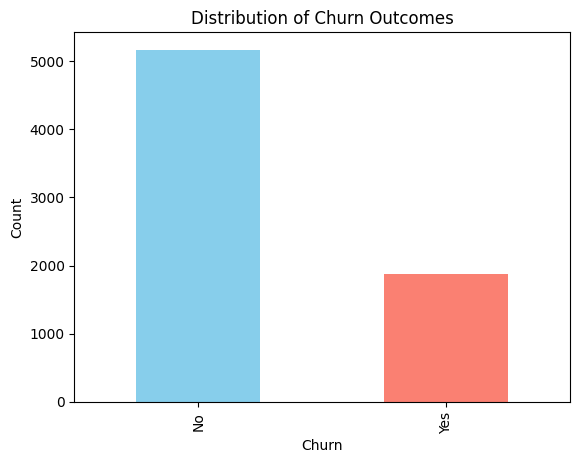

In [ ]:
import matplotlib.pyplot as plt
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Churn Outcomes')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

### Key Points
- Analyzing the target column helps clarify the prediction task.
- Check for class balance (classification) or value range (regression).
- Understanding the target guides model selection and evaluation.

### Review Questions
- How can you check if your target variable is balanced?
- Why is it important to understand the distribution of the target column?
- How does the target type affect your choice of model?

---

## 1.5 Obtaining Numerical Features from Categorical Columns <a id="categorical"></a>
Machine learning models typically require numerical input. Categorical features (e.g., 'InternetService') must be converted to numbers.

Two common methods:
- **One-hot encoding**: Creates a new binary column for each category. Best for nominal (unordered) categories.
- **Label encoding**: Assigns a unique integer to each category. Best for ordinal (ordered) categories.

For example, one-hot encoding transforms a column with three categories into three binary columns:
$$ X_{\text{encoded}} = \text{pd.get_dummies}(X_{\text{categorical}}) $$
This allows models to interpret categorical data correctly without assuming any ordinal relationship.

In [ ]:
# One-hot encode the 'InternetService' column
df_encoded = pd.get_dummies(df, columns=['InternetService'])
df_encoded.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True,False,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,...,No,One year,No,Mailed check,56.95,1889.5,No,True,False,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True,False,False
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True,False,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,False,True,False


### Key Points
- Converting categorical features to numerical is essential for most ML algorithms.
- Common methods include label encoding and one-hot encoding.
- Proper encoding preserves information and avoids introducing bias.

### Review Questions
- What are two common ways to encode categorical variables?
- Why is it important to convert categorical features to numeric?
- How can improper encoding affect your model?

---

## 1.6 Mapping of Ordinal Features <a id="ordinal"></a>
Ordinal features are categorical variables with a meaningful order, but not necessarily equal spacing between categories (e.g., education level, contract length).
Mapping ordinal features to integers preserves their order and allows models to use this information.

For example, the 'Contract' column has three levels:
- 'Month-to-month' < 'One year' < 'Two year'
We can map these to 0, 1, and 2, respectively:

$$ X_{\text{ordinal}} = X_{\text{categorical}}.\text{map}(\{\text{'Month-to-month'}: 0, \text{'One year'}: 1, \text{'Two year'}: 2\}) $$

This mapping helps models recognize the progression or ranking inherent in the data.

In [ ]:
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['ContractOrdinal'] = df['Contract'].map(contract_mapping)
df[['Contract', 'ContractOrdinal']].head()

,Contract,ContractOrdinal
0,Month-to-month,0
1,One year,1
2,Month-to-month,0
3,One year,1
4,Month-to-month,0


### Key Points
- Ordinal features have a natural order that should be preserved when encoding.
- Mapping ordinal categories to integers reflects their ranking.
- Proper handling of ordinal data improves model interpretability and performance.

### Review Questions
- What is an ordinal feature?
- How do you encode ordinal features in pandas?
- Why is it important to preserve order when encoding ordinal data?

---

## 1.7 Construction Features <a id="construction"></a>
Feature construction (feature engineering) involves creating new features from existing data to improve model performance. This can reveal hidden patterns or relationships.

Examples include:
- Combining features (e.g., total charges per month = total charges / tenure)
- Extracting date parts (e.g., year, month from a date)
- Creating interaction terms (e.g., product of two features)
- Binning continuous variables into categories
$$ X_{\text{new}} = f(X_1, X_2, ...) $$
Thoughtful feature construction can significantly boost the predictive power of machine learning models.

In [ ]:
# Create a new feature: TotalCharges per tenure month
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['ChargesPerMonth'] = df['TotalCharges'] / df['tenure']
df[['TotalCharges', 'tenure', 'ChargesPerMonth']].head()

,TotalCharges,tenure,ChargesPerMonth
0,29.85,1,29.850000
1,1889.50,34,55.573529
2,108.15,2,54.075000
3,1840.75,45,40.905556
4,151.65,2,75.825000


### Key Points
- Feature construction creates new variables that can improve model performance.
- Combining or transforming existing features can reveal hidden patterns.
- Domain knowledge often guides effective feature engineering.

### Review Questions
- What is feature construction?
- Give an example of creating a new feature from existing ones.
- How can feature construction impact model results?

---

## 1.8 Regression <a id="regression"></a>
Regression is a supervised learning technique used to predict continuous outcomes. Linear regression models the relationship between a dependent variable $y$ and one or more independent variables $X$.
The general form of a linear regression model is:
$$ y = Xw + b $$
where:
- $y$ is the target variable
- $X$ is the feature matrix
- $w$ is the vector of coefficients (weights)
- $b$ is the intercept (bias)
The coefficients represent the change in $y$ for a one-unit change in the corresponding feature, holding other features constant.

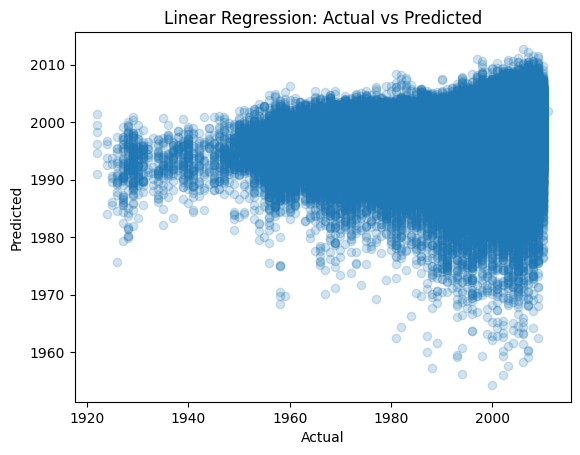

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Use the YearPredictionMSD dataset for regression
data = pd.read_csv('data/YearPredictionMSD.txt', header=None)
X = data.iloc[:, 1:5]
y = data.iloc[:, 0]
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(y, y_pred, alpha=0.2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

### Key Points
- Regression predicts continuous outcomes based on input features.
- Model evaluation uses metrics like RMSE, MAE, or R^2.
- Data preparation and feature selection are critical for good regression results.

### Review Questions
- What is the difference between regression and classification?
- Name two metrics for evaluating regression models.
- Why is feature selection important in regression?

---

## 1.9 Generalization, Overfitting, and Underfitting <a id="generalization"></a>
A good model should generalize well to new, unseen data.
- **Overfitting**: The model learns noise and details from the training data, performing poorly on new data.
- **Underfitting**: The model is too simple to capture the underlying pattern, resulting in poor performance on both training and test data.

The goal is to minimize the generalization error:
$$ \text{Generalization Error} = \mathbb{E}_{x,y}[(f(x) - y)^2] $$
where $f(x)$ is the model's prediction and $y$ is the true value.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
train_mse = mean_squared_error(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, model.predict(X_test))
print(f'Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')

Train MSE: 105.32, Test MSE: 105.20




### Key Points
- Generalization is the model's ability to perform well on unseen data.
- Overfitting means the model learns noise; underfitting means it misses patterns.
- Balancing model complexity is key to good generalization.

### Review Questions
- What is overfitting? What is underfitting?
- How can you detect if your model is overfitting?
- What strategies help improve generalization?

---

## 1.10 Model Complexity and Dataset Size <a id="complexity"></a>
Model complexity refers to the capacity of a model to fit a wide variety of functions. More complex models can fit training data better but may overfit if the dataset is small.

- **High bias**: Model is too simple (underfitting).
- **High variance**: Model is too complex (overfitting).
- **Optimal complexity**: Achieves a balance between bias and variance.

The bias-variance tradeoff is expressed as:
$$ \text{Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible\ Error} $$
Larger datasets help reduce variance and improve generalization, especially for complex models.

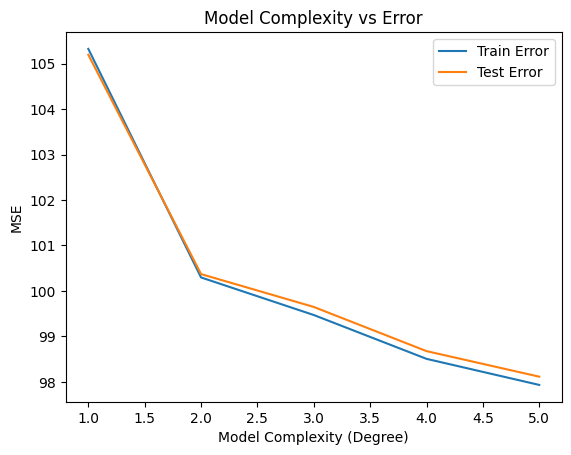

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
train_errors, test_errors = [], []
degrees = range(1, 6)
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    model.fit(X_poly, y_train)
    train_errors.append(mean_squared_error(y_train, model.predict(X_poly)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_poly_test)))
plt.plot(degrees, train_errors, label='Train Error')
plt.plot(degrees, test_errors, label='Test Error')
plt.xlabel('Model Complexity (Degree)')
plt.ylabel('MSE')
plt.legend()
plt.title('Model Complexity vs Error')
plt.show()



### Key Points
- Model complexity should match the amount and quality of data.
- Too complex models overfit; too simple models underfit.
- More data can allow for more complex models without overfitting.

### Review Questions
- How does dataset size affect model complexity?
- What happens if your model is too complex for your data?
- How can you address underfitting?

---

## 1.11 k-Nearest Neighbors (Regression) <a id="knnreg"></a>
k-Nearest Neighbors (k-NN) regression predicts the target value for a new data point by averaging the target values of its $k$ nearest neighbors in the feature space.

The prediction for a new point $x$ is:
$$ \hat{y} = \frac{1}{k} \sum_{i=1}^k y_i $$
where $y_i$ are the target values of the $k$ closest points to $x$.
- The choice of $k$ affects the model's bias and variance:
  - Small $k$: low bias, high variance (more sensitive to noise)
  - Large $k$: high bias, low variance (smoother predictions)
k-NN regression is non-parametric and can model complex relationships, but may be sensitive to irrelevant features and the scale of data.

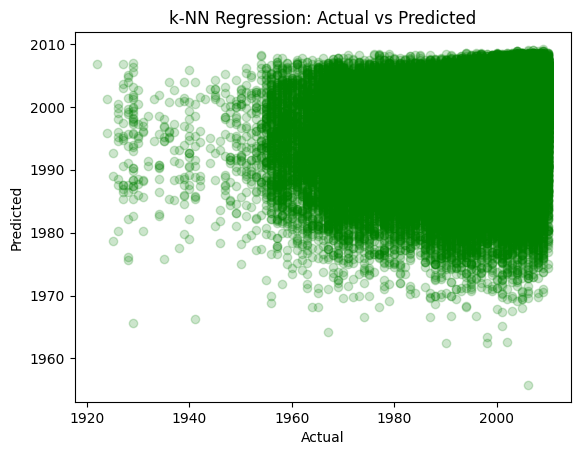

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_knn_pred = knn_reg.predict(X_test)
plt.scatter(y_test, y_knn_pred, alpha=0.2, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('k-NN Regression: Actual vs Predicted')
plt.show()



### Key Points
- k-NN regression predicts values by averaging the target of the k nearest neighbors.
- The choice of k and distance metric affects performance.
- Feature scaling is important for meaningful distance calculations.

### Review Questions
- How does k-NN regression make predictions?
- Why is feature scaling important for k-NN?
- How do you choose the value of k?

---

## 1.12 k-Nearest Neighbors (Classification) <a id="knnclass"></a>
k-Nearest Neighbors (k-NN) classification assigns a class to a new data point based on the most common class among its $k$ nearest neighbors.

The prediction for a new point $x$ is:
$$ \hat{y} = \text{mode}(y_1, ..., y_k) $$
where $y_i$ are the class labels of the $k$ closest points to $x$.
- The choice of $k$ affects the model's performance:
  - Small $k$: more sensitive to noise, may overfit
  - Large $k$: smoother decision boundaries, may underfit
k-NN classification is simple, effective for many problems, and works best when features are on similar scales and irrelevant features are minimized.

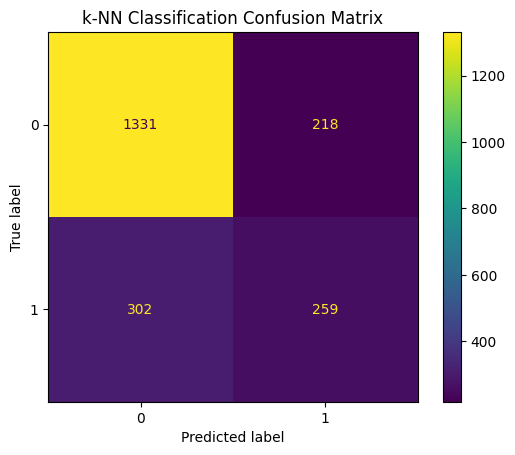

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# Use the Telco dataset for classification
le = LabelEncoder()
df_class = df.dropna(subset=['TotalCharges'])
X_class = df_class[['tenure', 'MonthlyCharges', 'ContractOrdinal']]
y_class = le.fit_transform(df_class['Churn'])
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.3, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_c, y_train_c)
y_pred_c = knn_clf.predict(X_test_c)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_c, y_pred_c)
plt.title('k-NN Classification Confusion Matrix')
plt.show()



### Key Points
- k-NN classification assigns the class most common among the k nearest neighbors.
- The choice of k and distance metric impacts accuracy and robustness.
- k-NN is sensitive to irrelevant features and the curse of dimensionality.

### Review Questions
- How does k-NN classification determine the predicted class?
- What are the effects of choosing a very small or very large k?
- What are some limitations of k-NN for classification tasks?

---

# Summary and Self-Assessment

### Key Points
- Data preparation and feature engineering are foundational for any machine learning workflow.
- Understanding your dataset, handling missing values, and encoding categorical/ordinal features are essential steps.
- Feature construction and selection can significantly impact model performance.
- Regression predicts continuous outcomes; classification predicts categories.
- Generalization, overfitting, and underfitting are central concepts for model evaluation.
- Model complexity should be balanced with dataset size to avoid bias or variance issues.
- k-Nearest Neighbors (k-NN) is a simple, non-parametric method for both regression and classification, but is sensitive to feature scaling and irrelevant features.

### Review Questions
- What are the main steps in preparing data for machine learning?
- How do you handle categorical and ordinal features?
- Why is feature scaling important, and when is it necessary?
- What is the difference between regression and classification tasks?
- How do you detect and address overfitting and underfitting?
- What is the bias-variance tradeoff?
- How does k-NN work for regression and classification?
- What are the limitations of k-NN and how can you address them?